###  Exercise 2: Basic Importance Sampling example
a) Given a set of N random numbers x that follow a standard normal distribution x ∼ N (0.0, 1.0).
Estimate the probability that these random numbers satisfy the condition x < θ for any θ
with and without Importance Sampling. Think about suitable Importance Sampling proposal
functions.

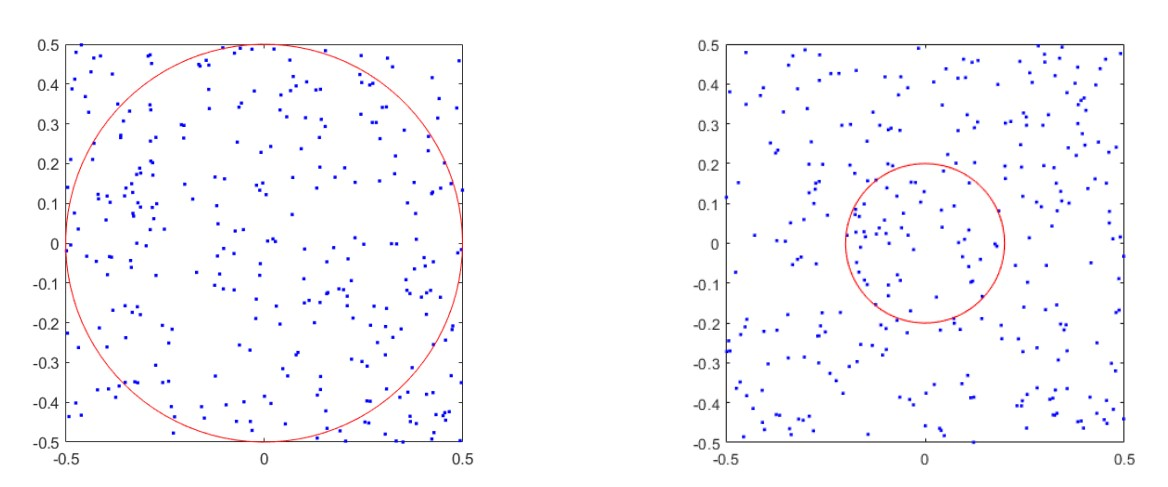
Fig. 1: Square with side length 1, circles with radius r = 0.5 resp. r = 0.2 and uniformly distributed
samples within the square.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, uniform

## Setting the number of samples and the proposal samples
samples = 200
proposal_samples = 2000

# Generate N random numbers that follow a standard normal distribution
x = np.random.normal(0,1,size=samples)

# Defining the target function
def target_fun(Theta):
    return np.mean(x < Theta)

# Defining the proposal distribution
def proposal_fun(Theta):
    return uniform.pdf(Theta, loc=-4, scale=12)

## Estimating the integral without Importance Sampling
Thetas = np.linspace(-5, 5, proposal_samples)
estimate_without_imp_sam = np.mean(np.less.outer(x, Thetas), axis=0)

# Estimating the integral with Importance Sampling
estimates = []
for i in range(proposal_samples):
    Theta = norm.rvs()
    estimates.append(target_fun(Theta) / proposal_fun(Theta))
estimates_with_importance_sample = np.mean(estimates)

# Print the results
print("Estimates without Importance Sampling: ",estimate_without_imp_sam)
print("Estimates with Importance Sampling: ",estimates_with_importance_sample)

# Estimate probabilities for different values of Theta
estimate_without_imp_sam = []
estimates_with_importance_sample = []
for Theta in Thetas:
    estimate_without_imp_sam.append(target_fun(Theta))
    estimates_with_importance_sample.append(target_fun(Theta) / proposal_fun(Theta))

Estimates without Importance Sampling:  [0. 0. 0. ... 1. 1. 1.]
Estimates with Importance Sampling:  6.18171


C:\Users\KORINE PALLI THARUN\AppData\Local\Temp\ipykernel_11272\3112537051.py:41: RuntimeWarning: invalid value encountered in double_scalars
  estimates_with_importance_sample.append(target_fun(Theta) / proposal_fun(Theta))


b) Plot the estimation result using the two techniques (with and without Importance Sampling)
as a function of the parameter θ in a meaningful way.


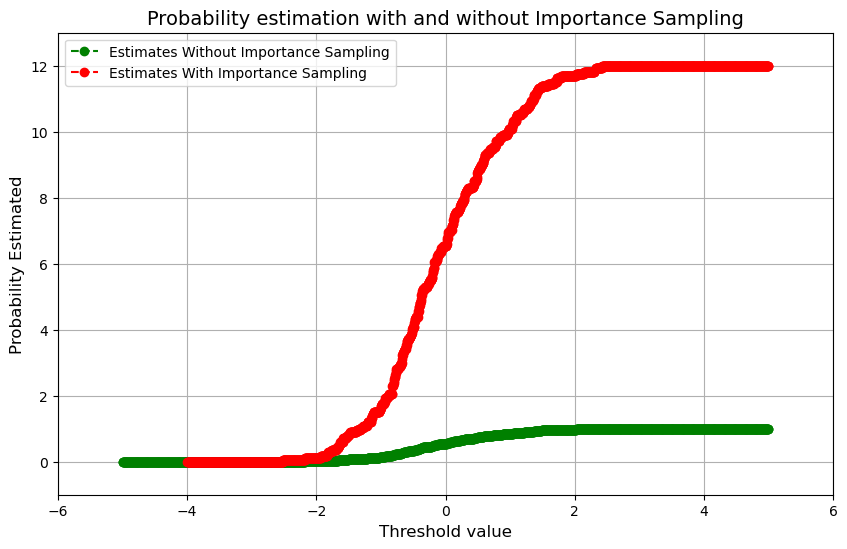

In [2]:
plt.figure(figsize=(10, 6)) 

plt.plot(Thetas, estimate_without_imp_sam, linestyle='--', marker='o', label='Estimates Without Importance Sampling', color="g")
plt.plot(Thetas, estimates_with_importance_sample, linestyle='--', marker='o', label='Estimates With Importance Sampling',color="r")
plt.xlabel('Threshold value', fontsize=12) 
plt.ylabel('Probability Estimated', fontsize=12)
plt.title('Probability estimation with and without Importance Sampling', fontsize=14)  
plt.legend(fontsize=10) 
plt.grid()
plt.xlim(-6, 6)
plt.ylim(-1, 13)

plt.show()